In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from matplotlib import style
import pickle

In [2]:
employee_data = pd.read_csv('workers_Data.csv')
employee_data.head()

,Name,BASIC PAY,DEPARTMENT,AGE,STATUS
0,Peter,15000,Computer,34,Single
1,John,17000,Computer,44,Maried
2,Kaman,19000,Finance,33,Divorced
3,Charles,21000,Research,33,Single
4,Johns,23000,Research,25,Single


In [3]:
employee_data.shape

(23, 5)

In [4]:
temp_data = employee_data.append(employee_data)

In [5]:
temp_data.shape

(46, 5)

In [6]:
temp_data = temp_data.drop_duplicates()
temp_data.shape

(23, 5)

In [7]:
employee_data.columns
employee_data.columns=[col.lower() for col in employee_data]
employee_data.columns

Index(['name', 'basic pay', 'department', 'age', 'status'], dtype='object')

In [8]:
employee_data=employee_data.rename(columns={
    'basic pay': 'basic_pay'
})

In [9]:
employee_data.head()

,name,basic_pay,department,age,status
0,Peter,15000,Computer,34,Single
1,John,17000,Computer,44,Maried
2,Kaman,19000,Finance,33,Divorced
3,Charles,21000,Research,33,Single
4,Johns,23000,Research,25,Single


In [10]:
employee_data.isnull().sum()

name          0
basic_pay     0
department    0
age           0
status        0
dtype: int64

In [11]:
employee_data.describe()

,basic_pay,age
count,23.000000,23.000000
mean,30145.652174,36.434783
std,14985.014365,20.371161
min,6500.000000,12.000000
25%,20000.000000,25.000000
50%,29000.000000,33.000000
75%,35000.000000,41.500000
max,70000.000000,98.000000


In [12]:
employee_data['basic_pay'].value_counts()

35000    2
15000    2
29000    2
70000    1
48098    1
43876    1
33000    1
27000    1
17000    1
21000    1
32876    1
19000    1
6500     1
10000    1
23000    1
59000    1
37000    1
31000    1
25000    1
32000    1
Name: basic_pay, dtype: int64

In [13]:
# correlation
employee_data.corr()

,basic_pay,age
basic_pay,1.000000,0.383314
age,0.383314,1.000000


In [14]:
subset = employee_data[['age', 'basic_pay', 'status']]

In [15]:
def social_class(x):
    if x >= 40000:
        return "high class"
    else:
        return 'average'
    
def retirement(y):
    if y >= 55:
        return 'close retirement'
    else:
        return 'liable'

In [16]:
condition = (employee_data['basic_pay']>= 20000)

In [17]:
# apply functions
employee_data['social_class'] = employee_data['basic_pay'].apply(social_class)
employee_data['liability'] = employee_data['age'].apply(retirement)

In [18]:
employee_data

,name,basic_pay,department,age,status,social_class,liability
0,Peter,15000,Computer,34,Single,average,liable
1,John,17000,Computer,44,Maried,average,liable
2,Kaman,19000,Finance,33,Divorced,average,liable
3,Charles,21000,Research,33,Single,average,liable
4,Johns,23000,Research,25,Single,average,liable
5,Thomas,25000,Computer,26,Maried,average,liable
6,Ann,27000,Finance,28,Maried,average,liable
7,Susan,29000,Finance,29,Divorced,average,liable
8,Tina,31000,Research,24,Divorced,average,liable
9,Andrew,33000,Computer,40,Single,average,liable


In [19]:
# apply lambda function
employee_data['social_class'] = employee_data['basic_pay'].apply(lambda x: 'high class' if x >=45000 else 'average')
employee_data

,name,basic_pay,department,age,status,social_class,liability
0,Peter,15000,Computer,34,Single,average,liable
1,John,17000,Computer,44,Maried,average,liable
2,Kaman,19000,Finance,33,Divorced,average,liable
3,Charles,21000,Research,33,Single,average,liable
4,Johns,23000,Research,25,Single,average,liable
5,Thomas,25000,Computer,26,Maried,average,liable
6,Ann,27000,Finance,28,Maried,average,liable
7,Susan,29000,Finance,29,Divorced,average,liable
8,Tina,31000,Research,24,Divorced,average,liable
9,Andrew,33000,Computer,40,Single,average,liable


In [20]:
plt.rcParams.update({'font.size': 20, 'figure.figsize': (10, 8)}) # set font and plot size to be larger


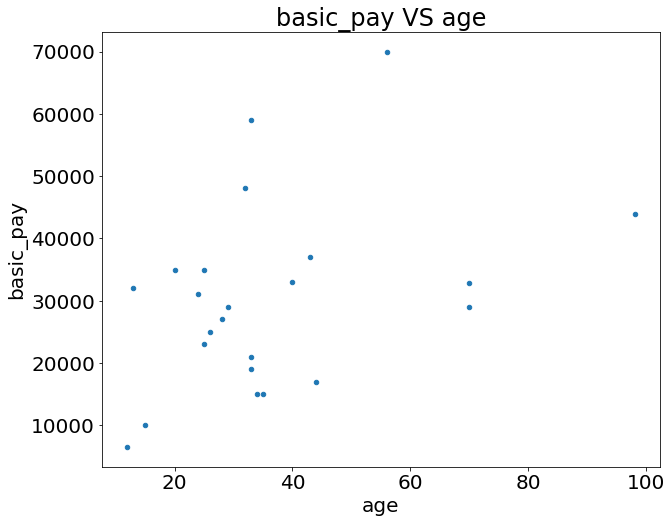

In [21]:
employee_data.plot(kind= 'scatter', x = 'age', y = 'basic_pay', title = 'basic_pay VS age');

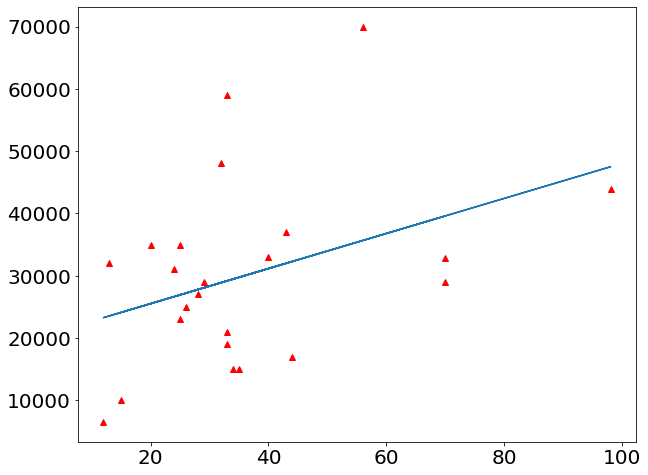

In [22]:
# draw line of best fit
plt.rcParams.update({'font.size': 20, 'figure.figsize': (10, 8)}) # set font and plot size to be larger
# employee_data.plot(kind= 'scatter', x = 'age', y = 'basic_pay', title = 'basic_pay VS age');
# generate data
x = employee_data.age
y = employee_data.basic_pay

plt.plot(x, y, 'r^') # create scatter plot
m, b = np.polyfit(x, y, 1) # m= slope b = intercept
plt.plot(x, m*x + b);#  add line of best fit

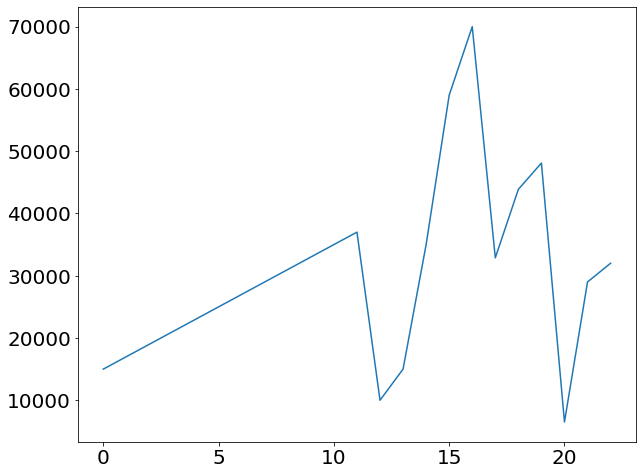

In [23]:
employee_data['basic_pay'].plot(kind = 'line', x= 'basic pay');